In [26]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import re
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [2]:
endsars = pd.read_csv(r'C:\Users\ADESOBA OLAMIDE\Desktop\LEARN_WITHUS_IQUBEl_LAB\WEEK 1\04_2019 to 07_2019.csv')

In [3]:
endsars.head()

,Datetime,Tweet Id,Text,Username,location,verified,created,retweet,likes
0,2019-06-30 23:58:57+00:00,1145481884459253760,@blossomm_ng @UnilagOlodo @yettyclassy @renoom...,de_godfella,Nigeria,False,2011-11-28 04:18:46+00:00,0,1
1,2019-06-30 21:57:10+00:00,1145451233219678209,When me and @Papadonkee and @AriyoAristotle an...,GhenhisKhan,Nigeria,False,2015-05-02 02:35:28+00:00,3,6
2,2019-06-30 20:43:42+00:00,1145432744534691842,@thupsie80 @Lordoye1 #ourmumudondo \n#EnoughIs...,Godskid_CFC,In Data,False,2011-06-02 19:43:17+00:00,0,0
3,2019-06-30 20:26:00+00:00,1145428290792022016,Nigerians are useless. Like play like play BIG...,Lagos2Texas,"Austin, TX",False,2018-10-21 22:48:29+00:00,0,0
4,2019-06-30 19:25:15+00:00,1145413002021220356,@jamestownbwoy 😂,UrFada_EndSARS,NaN,False,2019-03-08 17:15:49+00:00,1,1


In [4]:
text = endsars['Text'].str.cat(sep=',')

In [5]:
k = list(string.punctuation)

In [6]:
k.append('’')

In [7]:
new_doc = re.sub("s+"," ", text)
clean = "".join([i.lower() for i in new_doc if i not in k])
cleaned = ' '.join( [w for w in clean.split() if len(w)>4] )
new = ' '.join( [w for w in cleaned.split() if  not w.startswith('end')] )
data = nltk.tokenize.word_tokenize(new)

In [8]:
from nltk import ngrams, FreqDist
all_counts = dict()
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(data, size))

In [9]:
len(all_counts[2])

179922

In [10]:
len(all_counts[3])

237011

In [11]:
len(all_counts[4])

248658

In [87]:
def plot_ngrams(n,top):
        all_counts[n] = FreqDist(ngrams(data, n))
        dic[n] = dict(all_counts[n].most_common(top))
        frame = pd.DataFrame(dic[n].items(),columns=['%d_grams'%(n),'frequency'])
        
        plt.figure(figsize=(30,10))
        sns.barplot(x='%d_grams'%(n),y='frequency', data=frame)
        plt.xticks(rotation=90,fontsize = 20)
        plt.ylabel("Frequency")
        return  plt.show()

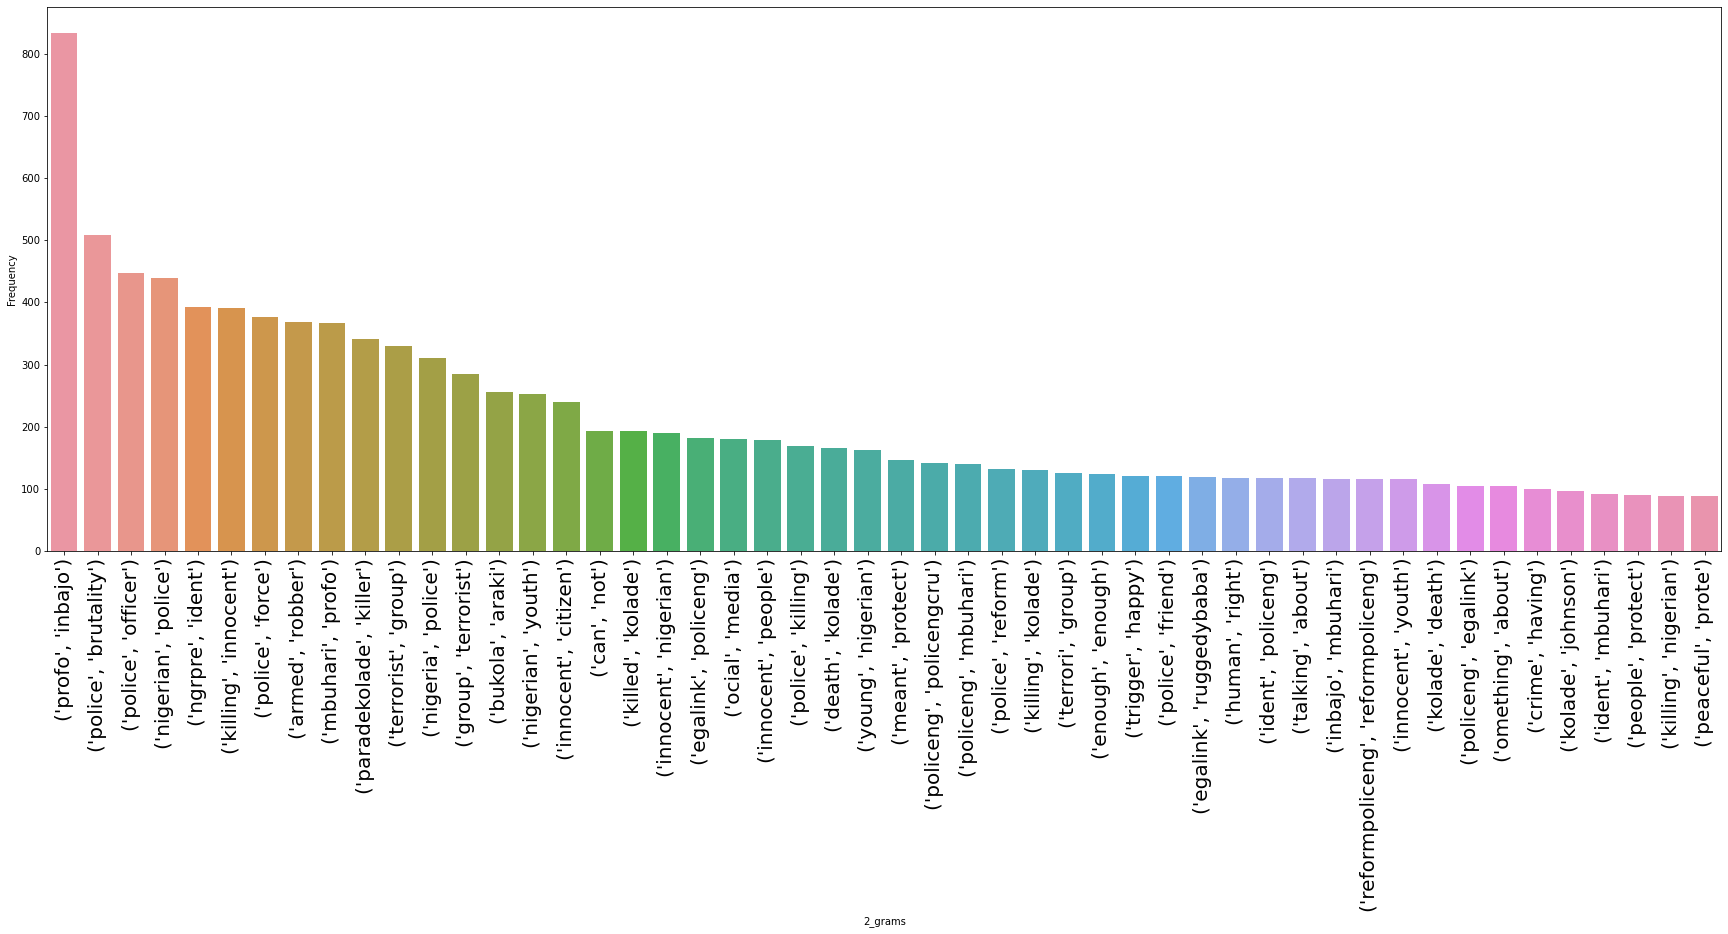

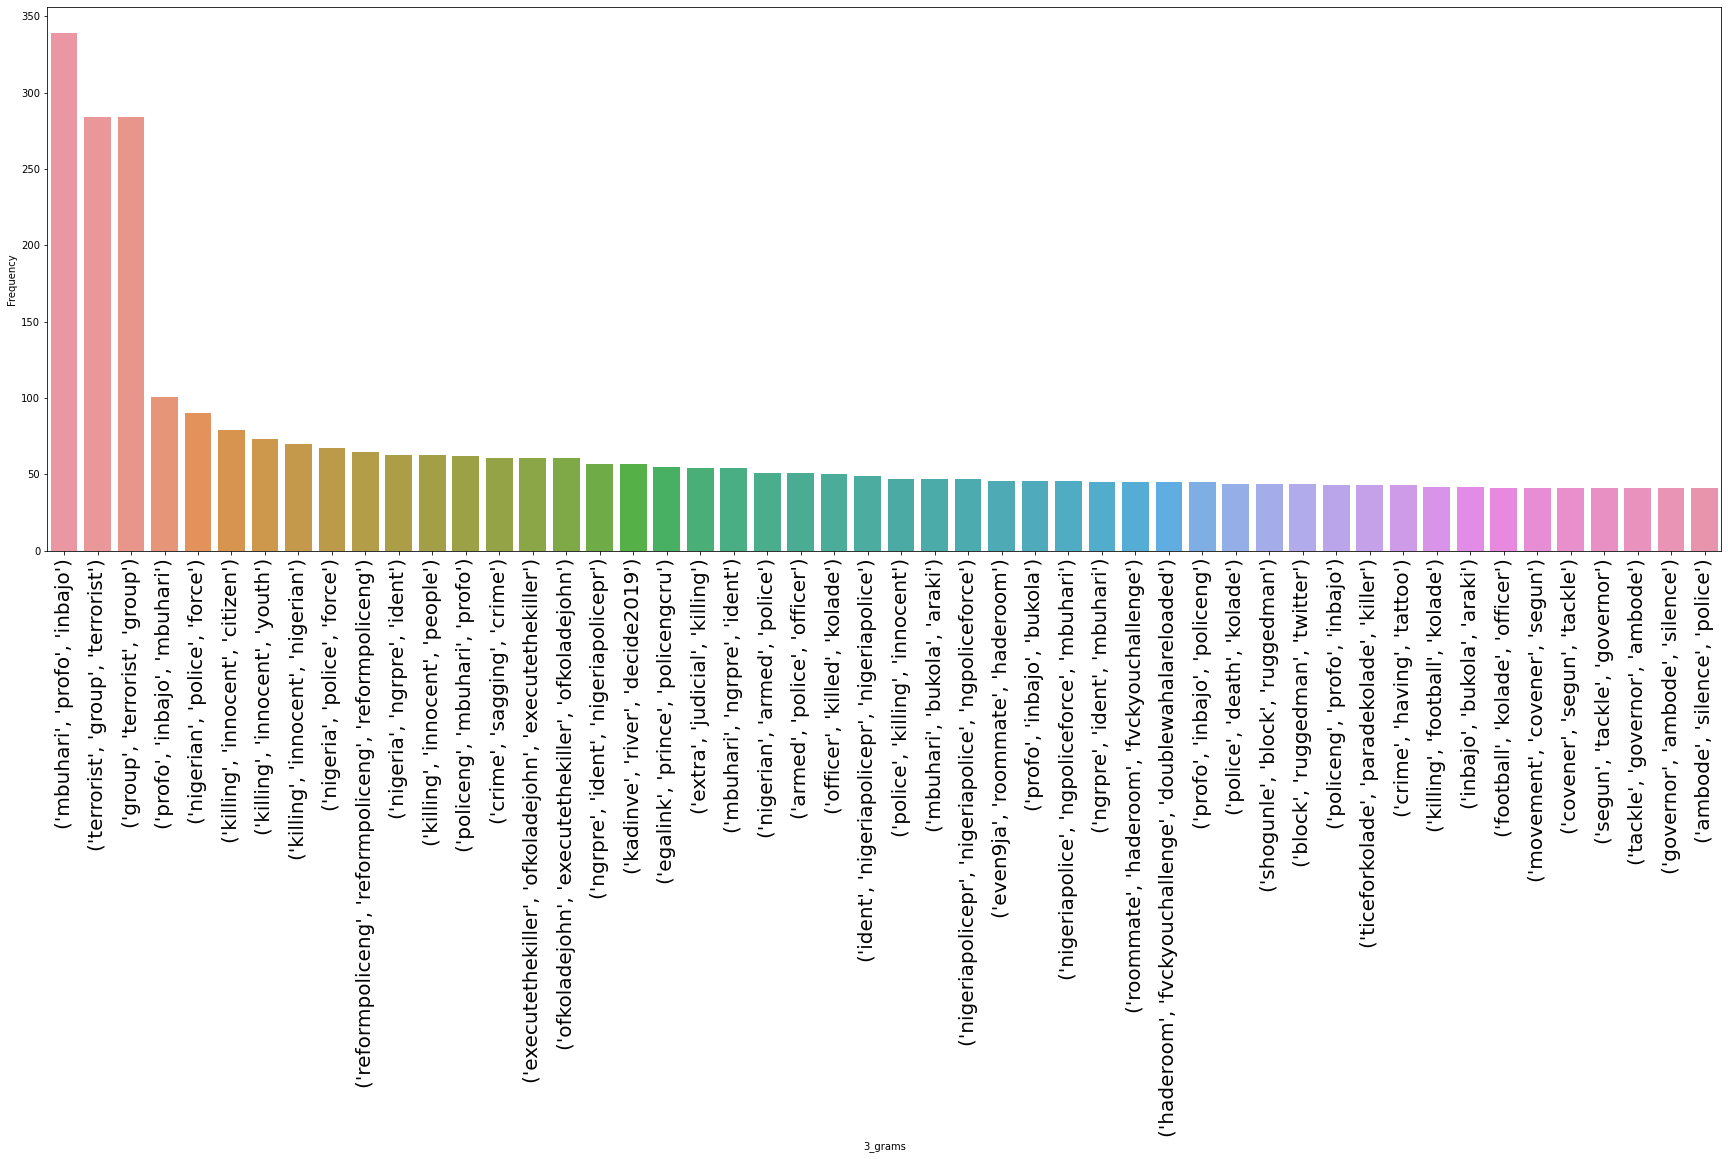

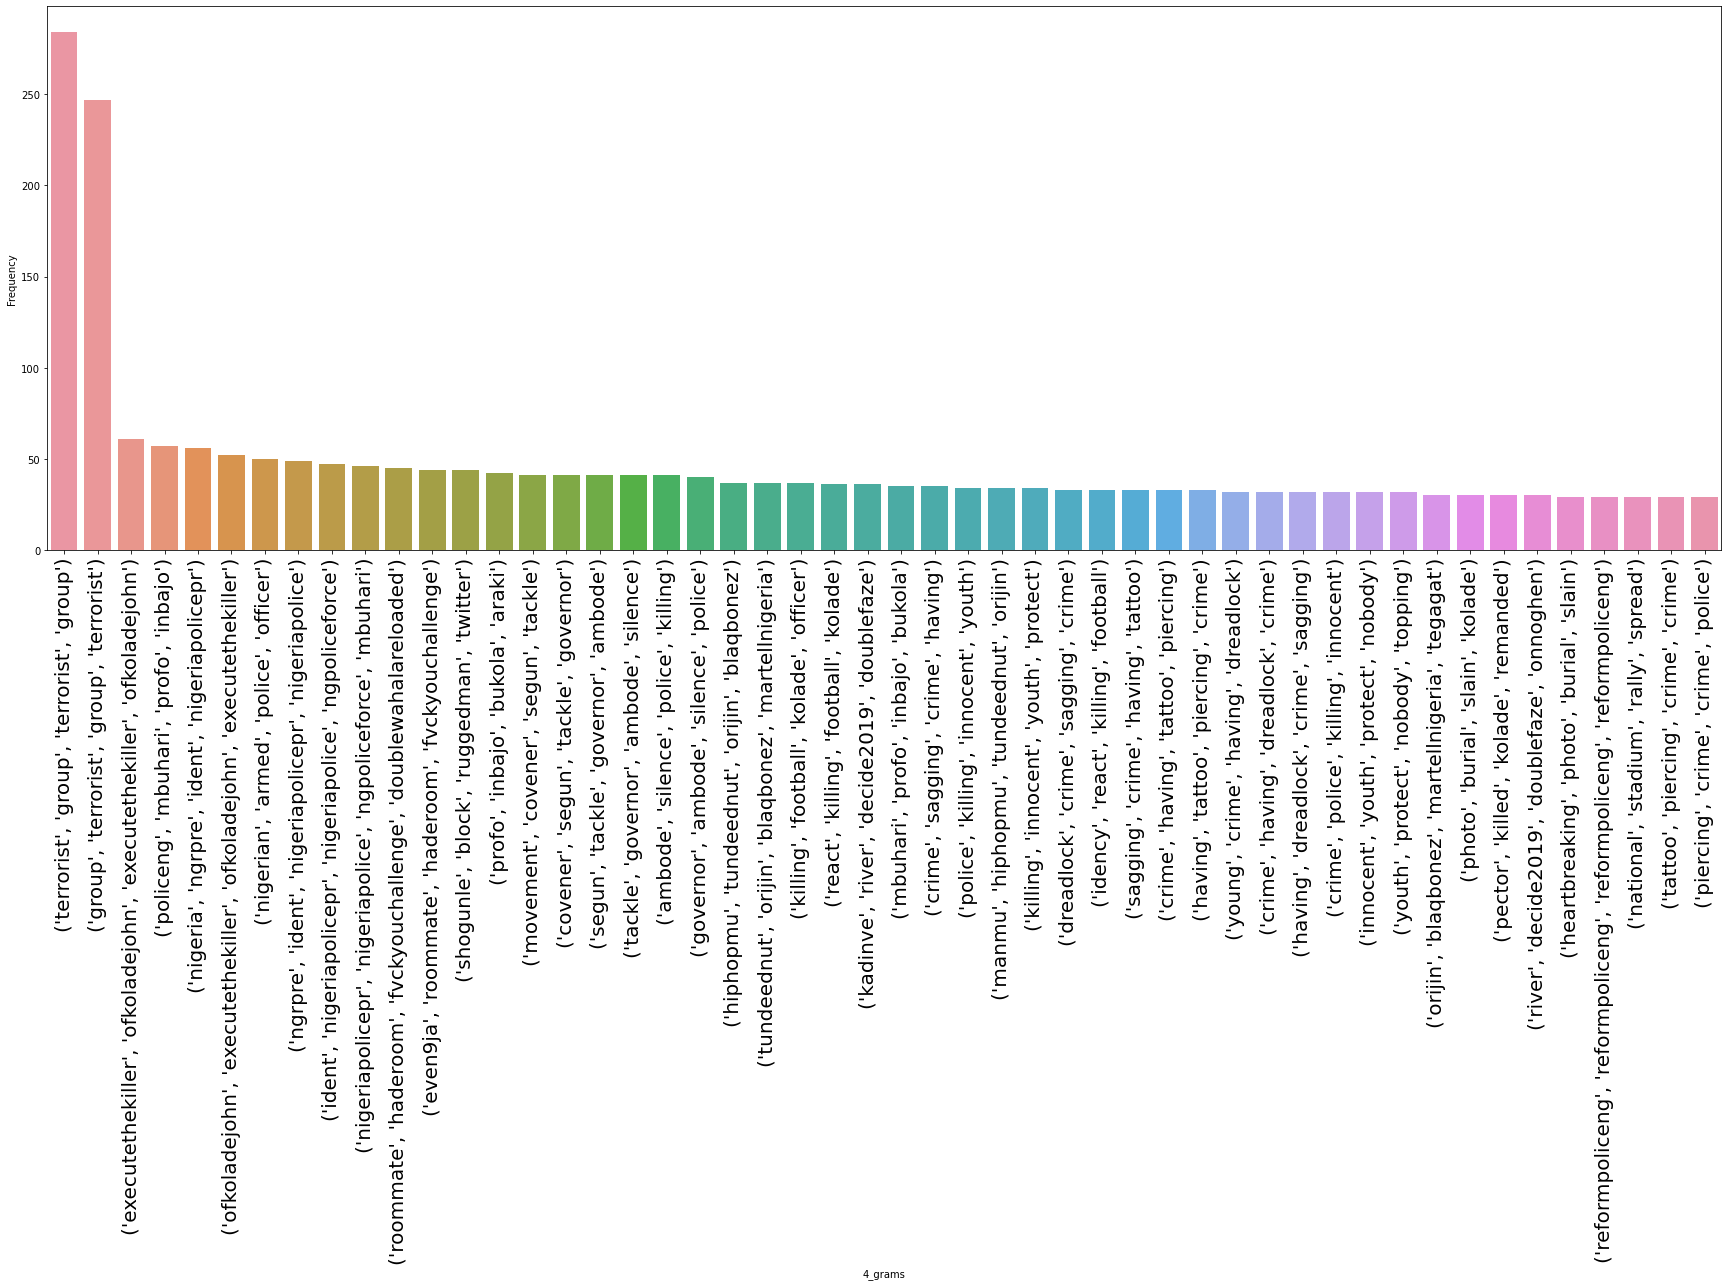

In [88]:
li = [2,3,4]
for j in li:
    plot_ngrams(j,50)